In [1]:
import numpy as np
global np
import scipy as sp
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
import wave
sys.path.append("../backend/")
%matplotlib inline

# The laplace transform

Today we are going to learn about another kind of transform. However, this transform is a more generalized version of the fourier transform.

When we write the continuous-time Fourier transform we often write 

$$ F(j \omega) = \int_{-\infty}^{\infty} f(t) e^{-j\omega t} dt $$
However, we can greatly generalize this formula with a small substitution:
$$ L(s) = \int_{-\infty}^{\infty} f(t) e^{-s t} dt $$
where $s = \sigma + j \omega$

Now you, like any sane and reasonable human being might be like "WHAT IS THIS CONFOUNDING $\sigma$ ??"
Previous we have been dealing with $\omega$ which we supposed to be the imaginary part of the frequency. However, now we are going to throw in an real component of frequency.

Two questions may come to your head right now. "What is real frequency?" and "how is this a generalized Fourier transform?"

To answer question 2 first, if we evaluate the laplace transform with $s=j\omega$ we obtain the fourier transform.

For question 1, we are going to consider what happens when $\omega = 0$. We obtain:
$$L(\sigma) = \int_{-\infty}^{\infty} f(t)e^{-\sigma t}$$

Before complex exponentials were just sines and cosines and multiplying by complex exponentials selects for sines and cosines in the signal $f(t)$.

Now we are dealing with normal exponential functions and are multiplying our signal $f(t)$ by these exponential functions in order to see what exponential content is within them.

We shall now consider some properties of the laplace transform:

## Homework Exercise

Prove the following properties of the laplace transform:
The laplace transform is linear.

PROOF GOES HERE

Time shifting, that if $x(t)$ transforms to $X(s)$ then $x(t-t_{0})$ transforms to $e^{-st_{0}}X(s)$.

PROOF GOES HERE

Phase shirting, that if $x(t)$ transforms to $X(s)$ then $e^{s_{0}t}x(t)$ transforms to $X(s-s_{0})$.

PROOF GOES HERE

Differentiation in time domain, that $\frac{d x(t)}{dt}$ transforms to $sX(s)$.

PROOF GOES HERE

Integration in the time domain, $\int_{-\infty}^{t} x(\tau) d\tau$ transforms to $\frac{1}{s}X(s)$.

PROOF GOES HERE

Convolution, that $x_{1}(t) * x_{2}(t)$ transforms to $X_{1}(s)X_{2}(s)$.

PROOF GOES HERE

Using that above show that $u(t) * x(t)$ transforms to $\frac{1}{s}X(s)$.

PROOF GOES HERE

Show that the impulse response of a system is equivelent to the inverse laplace transform of the transfer functino

PROOF GOES HERE

Okay, a new transform, why do I care?

Firstly, we have mentioned before that complex exponetials are the eigenfunctions of LTI systems. However, if we were not be the most general we could be previously. Previously our eigenfunction was $e^{j \omega t}$ which has an imaginary component in the exponent. However, now that we have added a complex part we really have a complex exponential.
In particular, 
$$y(t) = \int h(\tau)e^{-s(t-\tau)} d\tau$$
$$y(t) = e^{\tau s} \int h(\tau)e^{-st} d\tau$$

Well it turns out that so many linear systems are trivially modeled by a laplace transform. 
And that is for the following reason:
$$\int_{-\infty}^{\infty} \frac{df(t)}{dt}e^{-st}dt = sL(f(t))-f(0)$$ by integration by parts (I am not going to write this out lol proof found here:https://www.mathalino.com/reviewer/advance-engineering-mathematics/laplace-transforms-derivatives )

For the second derivative we have that 
$$\int_{-\infty}^{\infty} \frac{d^2 f(t)}{dt^2}e^{-st}dt = s^2L(f(t)) -sf(0) - f'(0)$$

and so on.

Because we often assume that our initial conditions are stationary (e.g. $f(0)=0$, $f'(0) = 0$) we can say in many cases that $$L(f^{n}(t)) = s^{n}L(f(t))$$ where this means that the laplace transform of the nth derivative of a signal is $s^{n}$ times the laplace transform.

We can use this property in order to convert ordinary differential equations into something more....palitable. 
First, allow us to consider an example problem.
We are going to consider analyzing an RLC circuit 
https://www.mathworks.com/help/control/ug/analyzing-the-response-of-an-rlc-circuit.html
As documented on the mathworks website we find that the voltage-to-voltage transfer function of this RLC circuit is:
$$H(s) = \frac{\frac{s}{RC}}{s^2+\frac{s}{RC}+\frac{1}{LC}}$$

Let's consider the step response of this RLC circit for many different values of R,L,C


In [2]:
def RLCDemo(R=1000,C=10.**(-10),L=10.**(-5)):
    num = [0,1,0]
    den = [R*C,1,float(R)/float(L)]
    tf = signal.TransferFunction(num,den)
    t,y = sp.signal.step(tf)
    plt.figure()
    plt.plot(t,y);
    plt.show()
    
interact(RLCDemo,R=(1.,100),C=(1,100),L=(1,100)); #NOTE: In reality resistance, capacitance, and inductance values are very different than this, but this isn't a circuits class.

interactive(children=(FloatSlider(value=100.0, description=u'R', min=1.0), IntSlider(value=1, description=u'C', min=1), IntSlider(value=1, description=u'L', min=1), Output()), _dom_classes=('widget-interact',))

We want to be able to understand how this response comes about. 
There are several things that people have made matrics of:




# Bode Plots

A bode plot is a log-log plot of frequency versus some quantity (often amplitude). It allows us to get a lot of information and condence it into a very small area. The original why log-log plots are so well used is because they preserve lines from normal plots.

So, in general we define the bode plot of some data to be 
$$ Bodeplot = 20 \log( \omega)$$

where the units of the y-axis of the bode plot is in decibels.

Decibles are a unit-agnostic measure of intensity. They obey the property that 3dB of amplitude change correspondes to a factor of 2 amplitude change and 6dB of power corresponds to a factor of 2 change in power.

With this knowledge under out belt let's consider an example.



Consider the following picture of the bode plot of a low pass filter:
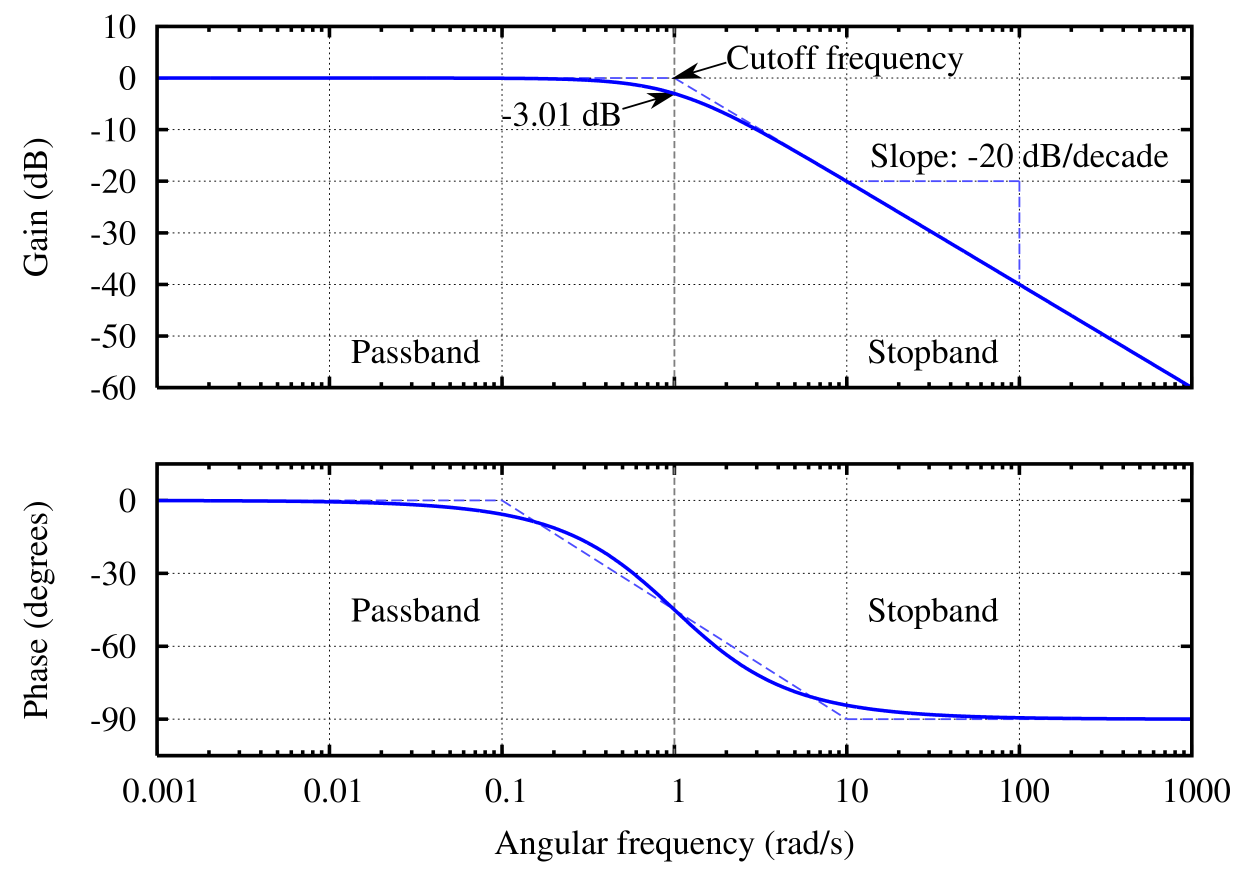

We see that after the cutoff frequency the filter seems to be dropping at a rate of 20dB per decade. This means that for every order of magnitude of frequency that we increase by we loss 20dB of intensity to our signal. For amplitude this means that over a decade we will loss approximately $\frac{1}{2^{7}}$ of the signal.

It is worth noteing that this is a very simple filter since 20dB per decade is the slowest that a regular filter will drop. 


# Bandwidth in Transfer Functions

Now that we understand bode plots we can consider bandwidth in amplifiers.

An amplifier is a device that takes in a signal and is able to multiply the intensity of it by an amount that we usually call the gain.

Consider the bode plot of the transfer function of an amplifier:

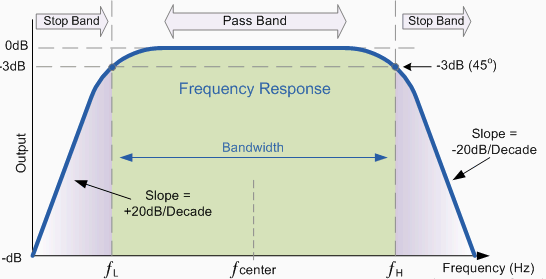

We note that we define the bandwidth of the amplifier to be the width of the frequencies that this amplifier will pass.

In particular, we define bandwidth to be the distance between the two -3dB points on either edge of the pass band.

# Controls

One of my favorite topics, and something with A LOT of substance to it, controls is a super interesting. Controls is the act of make making shitty actuators behavor reasonably. Given that you know something about your system (a crude model, some knowledge about how it behaves in certain situations, anything really) you can create a control system that attempts to avoid or head towards certain "states". 

Today we are going to deal with three easy methods of control, proportional, derivative, and integral as well as one harder one which will be a state space formulation of control.

## Proportional Control
In most all cases we want to have a system obtain a certain state so we want some kind of proportional control on our system. 
Imagine a scenario of a robot heading towards a wall. We want to robot to stop right at the wall. One thing we could do it say "keep moving until at wall, then stop motors" but because of momentum our little robot friend will careen head first into the wall. So, as we get towards the wall we want to slow down. That is the idea behind proportional control, the closer we our to our target the slower we want to get there so that we don't overshoot.


In [3]:
def proportionalcontroldemo(k=1):
    m = 1.
    x = 100
    v = 0
    T = 0.001
    positionlist = [x]
    for i in range(1000):
        v = -1.0*k*x
        x = x + v*T
        positionlist.append(x)
    plt.figure()
    plt.plot(positionlist)
    plt.plot()
    
interact(proportionalcontroldemo,k=(1,30));

interactive(children=(IntSlider(value=1, description=u'k', max=30, min=1), Output()), _dom_classes=('widget-interact',))

So, for this single pole system we find that for very small amounts of feedback control we can have arbitrarily faster convergence to our desired state.
## "BUT MR SLUDDS, WHY DON'T WE JUST GIVE INFINITE FEEDBACK?"
Good question imaginary billy, there are several reasons why:
Firstly noise:
# SLUDDS DO THE NOISE CALCULATION
Secondly hardware constraints:
Whatever actuator you are using probably can't convert infinite energy into infinite actuation in a linear manner (for a motor, doubling the power into it does not double the torque out).

So, it seem we can control the robot reasonably fine, so why do we need anything else?

Let's consider a system where the robot is under some kind of constant force. Suppose our robot has now mystically transformed into a quad-copter with a single propellor, and now has become conscious of the influence of gravity.



In [4]:
def badproportionalcontroldemo(k=1):
    Fg = 1.*9.81
    x = 0
    gamma = 0.3
    desired = 100
    T = 0.01
    positionList = []
    for i in range(1000):
        v = 1.*gamma*(desired-x) -Fg #I know, velocity as acceleration is bad, but the system is underdetermined so meh
        x = x + k*v*T
        positionList.append(x)
    plt.figure()
    plt.plot(positionList)
    plt.plot()
    
interact(badproportionalcontroldemo,k=(0.1,10));

interactive(children=(FloatSlider(value=1.0, description=u'k', max=10.0, min=0.1), Output()), _dom_classes=('widget-interact',))

Oh weird, so the quadcopter is not able to make it all the way to its desired steady-state value. This makes sense since if the quadcopter were at steady-state then the proportional controller would be exerting zero force but the force of gravity would still act upon the quadcopter. Thus, we need some kind of controller that can compensate for constant offsets put on the system.
ENTER:
## Integral Controller

The idea behind the integral controller is that we are going to integrate / sum all of the error in the system and put it as a signal into the acctuator (motor) to drive it.

In [5]:
def integralcontrollerDemo(kp=1,ki=0):
    Fg = 1.*9.81
    x = 0
    gamma = 0.3
    desired = 100
    T = 0.01
    positionList = []
    summederror = 0 
    for i in range(2000):
        v = 1.*gamma*(desired-x) -Fg
        summederror += 1.*gamma*(desired-x)
        x = x + kp*v*T+ki*summederror*T
        positionList.append(x)
    plt.figure()
    plt.plot(positionList)
    plt.plot()
    
interact(integralcontrollerDemo,kp=(0.1,10),ki=(0.0000000,0.01,0.0001));

interactive(children=(FloatSlider(value=1.0, description=u'kp', max=10.0, min=0.1), FloatSlider(value=0.0, description=u'ki', max=0.01, step=0.0001), Output()), _dom_classes=('widget-interact',))

So, even the smallest amount of integral control is able to cause the system to eventually converge, but too much intergral control cause the system to overshoot. You can think about this as being that the integral control stores too much error while the system is still climbing, and then when the system hits the top the integral controler has to try to disipate all of its generated error.
So, if we are doing this digitally we actually can make a small non-linear improvement to this controller. We can set the highest value that the integral controller can sum to.

In [6]:
def integralcontrollerwithmaxsumDemo(kp=1,ki=0,maxsum=100):
    Fg = 1.*9.81
    x = 0
    gamma = 0.3
    desired = 100
    T = 0.01
    positionList = []
    summederror = 0 
    for i in range(2000):
        v = 1.*gamma*(desired-x) -Fg
        if(summederror < maxsum):
            summederror += 1.*gamma*(desired-x)
        x = x + kp*v*T+ki*summederror*T
        positionList.append(x)
    plt.figure()
    plt.plot(positionList)
    plt.plot()
    
interact(integralcontrollerwithmaxsumDemo,kp=(0.1,10),ki=(0.0000000,0.01,0.0001),maxsum=(0,1000));

interactive(children=(FloatSlider(value=1.0, description=u'kp', max=10.0, min=0.1), FloatSlider(value=0.0, description=u'ki', max=0.01, step=0.0001), IntSlider(value=100, description=u'maxsum', max=1000), Output()), _dom_classes=('widget-interact',))

Cool, so we can crank the integral controller all of the way up and set maxsum such that we don't obtain any kind of overshoot. What is the downside of this however?
Well, let's have a look.

In [7]:
def integralcontrollerwithmaxsumwithnoiseDemo(kp=1,ki=0,maxsum=100,noisemagnitude=1):
    Fg = 1.*9.81
    x = 0
    gamma = 0.3
    desired = 100
    T = 0.01
    positionList = []
    summederror = 0 
    noisesource = 2*noisemagnitude*np.random.random_sample(2000)-noisemagnitude
    for i in range(2000):
        v = 1.*gamma*(desired-x+noisesource[i]) -Fg
        if(summederror < maxsum):
            summederror += 1.*gamma*(desired-x)
        x = x + kp*v*T+ki*summederror*T
        positionList.append(x)
    plt.figure()
    plt.plot(positionList)
    plt.plot()
    
interact(integralcontrollerwithmaxsumwithnoiseDemo,kp=(0.1,40),ki=(0.0000000,0.01,0.0001),maxsum=(0,1000),noisemagnitude=(0.0,100.));

interactive(children=(FloatSlider(value=1.0, description=u'kp', max=40.0, min=0.1), FloatSlider(value=0.0, description=u'ki', max=0.01, step=0.0001), IntSlider(value=100, description=u'maxsum', max=1000), FloatSlider(value=1.0, description=u'noisemagnitude'), Output()), _dom_classes=('widget-interact',))

First thing to do, turn off integral control and increase proportional control with a fixed noisemagnitude. How does the system respond? 

Well, as we calculated above we find that by increasing the amount of proportional gain increases the noise gets exagerated linearly. As we listed above this is a reason why even with a very simple system we can't have an infinitely fast proportional controller, it would not be able to track the desired value.

So, why not PI for everything?
It turns out that more complicated systems are not able to be controlled by a PI controller. A very simple example that we can walk through is the following system:

$H(s) = \frac{1}{(s-a)(s-b)}$ for $a>0$ and $b>0$

Applying a PD controller we find that 

$$\frac{Y(s)}{X(s)} = \frac{1}{(s-a)(s-b)+k_{p}+sk_{d}}$$

where $k_{p}$ and $k_{d}$ are the proportional constant and derivative constant respectively.

Note that there are now choices for $a$ and $b$ such that we can no longer stabilize the system with just $k_{p}$ and no derivative control. This is the reason why we motivate the derivative control of a system.

## PID Control
We now have all of the tools in order to create the PID controller. This is the control jewel of non-model predictive control (basically, I don't have a model of the system, can I throw a controller on it and make it work?).
In industry 95% of controllers are PI controllers, 4% are PID controllers and 1% are model predictive controllers ( we are getting to these).


In [12]:
def PIDdemo(kp=1,ki=0,kd=0,maxsum=100,noisemagnitude=1):
    Fg = 1.*9.81
    x = 0
    gamma = 0.3
    desired = 100
    T = 0.01
    positionList = []
    summederror = 0 
    priorerror = 0.
    noisesource = 2*noisemagnitude*np.random.random_sample(2000)-noisemagnitude
    for i in range(2000):
        v = 1.*gamma*(desired-x+noisesource[i]) -Fg
        if(summederror < maxsum):
            summederror += 1.*gamma*(desired-x)
        x = x + kp*v*T+ki*summederror*T + kd*(1.*gamma*(desired-x)-priorerror)
        priorerror = 1.*gamma*(desired-x)
        positionList.append(x)
    plt.figure()
    plt.plot(positionList)
    plt.plot()
    
interact(PIDdemo,kp=(0.1,100),ki=(0.0000000,0.1,0.01),kd=(0,1,0.001),maxsum=(0,1000),noisemagnitude=(0.0,100.));

interactive(children=(FloatSlider(value=1.0, description=u'kp', min=0.1), FloatSlider(value=0.0, description=u'ki', max=0.1, step=0.01), FloatSlider(value=0.0, description=u'kd', max=1.0, step=0.001), IntSlider(value=100, description=u'maxsum', max=1000), FloatSlider(value=1.0, description=u'noisemagnitude'), Output()), _dom_classes=('widget-interact',))

A very convenient video that shows the benefits of PID control is here:
https://www.youtube.com/watch?v=4Y7zG48uHRo

Okay, so why do we want anything else? All of the cool kids say "I threw a PID controller on it and it worked", but the cool kids aren't always the controls kids.

Into the arena comes:
## Model Predictive Control
So, one limitation of our current controllers is that they only measure information from one source and output to one source, but what about if we wanted to measure from measure from multiple sources and output to multiple motors? An example of where you want to do this is with a quadcopter. You have multiple things you are sensing (roll, pitch, yaw, elevation, etc) and the motors. In fact, motor quadcopters will have ~60 things that they are sensing and want to predict based on their model of the system what the based thing they should do with the motors is.
In general, model predictive control is a HUGE field. If you want to learn more, take 6.302 (best class!) this Spring.

So, there are a few things that we can talk about with regard to model predictive control.

The first is what kind of systems are controllable?
For a state in a system to be controllable means that the controller on the system is able to make that state track the value we want it to track. We says that a system is controllable if there are no poles in the right half plane of the system. This corresponds to all possible error into the system "dying" over time / decaying in energy exponetially.

Next is what kind of states are observable?
Observability is a really interesting thing in our system. With a very good model of our system we can say that there are things that we want to sense that are related to other things that we are sensing in our system. For example, in rocket design we want to be able to sense the stress on the fusalage of the rocket. However, putting strain-gauages all along the side of the rocket is a horrible idea (they get heavy, change aerodynamics, burn up as you travel through the atmosphere etc). So, what NASA/SpaceX/yuppie rocket startup will do is have a ton of sensors inside of their rocket which from simulation they are able to return a huge matrix representing the model of the system. They hope that, the states that they care about (strain/stress on fusalage in this example, in reality they might have 1000 or so states that they want to make sure that they can observe reasonably well).
Mathematically observability is defined as the following:

A state of a system is observable if all rows of the system have at least one non-zero value. In the case that a matrix does have a column of all zeros then that means that no output of the system contains information about an input state of the system.

Finally, we can talk about the Kalman Filter. 
With our state space model of the system we assume that the model has a certain amount of fixed weight and that the incoming data has a certain amount of fixed weight. However, with the Kalman Filter we are assuming that that weight updates as a function of how sure we are that the incoming data is reliable. Essentially, if the sensors start freaking out from how we think they should perform we are going to move towards our model to minimize the effect of defective sensors on the controller. If our model starts freaking out (maybe because it is a poor model) we will rely on the sensors more. This turns out to be the provably most optimal filter for systems with Gaussian noise. 


So, the takeaway from today's lecture:
If you don't have a model of your system and it is reasonably simple, throw a PID controller on it and play with the parameters until it works.
If you do have a model of your system, first prove that it is a controlable system using the definition of controlability that we talked about above. Then, throw a Kalman filter on top of it. This is honestly has a very large amount of industrial controls are done and with this knowledge you should be able to control just about anything that you want to.